# DATA2001 Assingment 1

## Objectives 
1. Identify Missing Data and Handle
2. Visualise Data
3. Investigate Differences between Species 
4. Forcast using k-Means and PCA

## Table of Contents

Todo

# 1. Problem Formation

# 2. Data Collection

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.


1. **studyName**- Sampling expedition from which data were collected, generated, etc.

2. **Sample Number** - an integer denoting the continuous numbering sequence for each sample

3. **Species**- a character string denoting the penguin species

4. **Region** - a character string denoting the region of Palmer LTER sampling grid

5. **Island** - a character string denoting the island near Palmer Station where samples were collected

6. **Stage** - a character string denoting reproductive stage at sampling

7. **Individual ID** - a character string denoting the unique ID for each individual in dataset

8. **Clutch Completion** - a character string denoting if the study nest observed with a full clutch, i.e., 2 eggs

9. **Date Egg**- a date denoting the date study nest observed with 1 egg (sampled)

10. **Culmen Length**- a number denoting the length of the dorsal ridge of a bird's bill (millimetres)

11. **Culmen Depth** - a number denoting the depth of the dorsal ridge of a bird's bill (millimetres)

12. **Flipper Length**- an integer denoting the length penguin flipper (millimetres)

13. **Body Mass**- an integer denoting the penguin body mass (grams)

14. **Sex** - a character string denoting the sex of an animal

15. **Delta 15 N**- a number denoting the measure of the ratio of stable isotopes 15N:14N

16. **Delta 13 C** - a number denoting the measure of the ratio of stable isotopes 13C:12C

17. **Comments** - a character string with text providing additional relevant information for data

## 2.1 Load penguins_iter.csv



In [269]:
# import pandas
import pandas as pd

#Supresss warnings for neatness
import warnings
warnings.filterwarnings("ignore")

#load data
df = pd.read_csv('penguins_lter.csv')

#view head
df.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


### Missing Values

In [270]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [271]:
print("Percentage of missing values by column:")
#Percentage missing values by column
df.isnull().sum()/len(df)*100

Percentage of missing values by column:


studyName               0.000000
Sample Number           0.000000
Species                 0.000000
Region                  0.000000
Island                  0.000000
Stage                   0.000000
Individual ID           0.000000
Clutch Completion       0.000000
Date Egg                0.000000
Culmen Length (mm)      0.581395
Culmen Depth (mm)       0.581395
Flipper Length (mm)     0.581395
Body Mass (g)           0.581395
Sex                     2.906977
Delta 15 N (o/oo)       4.069767
Delta 13 C (o/oo)       3.779070
Comments               92.441860
dtype: float64

In [272]:
rows = df.shape[0]
__ = df.drop('Comments', axis=1)
print('Rows missing values (excluding comments):', rows-__.dropna().shape[0])

Rows missing values (excluding comments): 19


In [273]:
#save comment row and sex
comments = df['Comments']
sex = df['Sex']
df = df.drop('Comments', axis=1)
df = df.drop('Sex', axis=1)


#replace all other missing values with the mean of the column 
df = df.fillna(df.median())

#fill missing comments with place holder
comments = comments.fillna('No comment')

#fill missing sex's with Unknown
sex = sex.fillna('Unknown')

#replace
df['Comments'] = comments
df['Sex'] = sex

### Missing values and imputation 

92% of the rows are missing comments. I am going to assume that we can keep these rows and replace the missing comments with a place holder as comments appear to be optional. There are 19 rows that are missing values exluding comments. These are all continuous data types. Replacing these with the median appears to be appropriate given the nature of the distribution of the missing values. In this case imputing with the median as opposed to the mean was done in hopes that the use of the median mitigates the effect of outliers on the analysis. However, median or mean would probably both be suitable in the context of k-means and PCA. 

# 3. Exploratory Data Analysis (EDA)

Including univariate and bivariate EDA for all relevant columns.  



## 3.1 Univariate

In [274]:
df.duplicated().sum()

0

Nice! No duplicates. 

### studyName 
Sampling expedition from which data were collected, generated, etc.

In [275]:
df['studyName'].unique()

array(['PAL0708', 'PAL0809', 'PAL0910'], dtype=object)

Data appears to be a combination of three seperate studies.  

In [276]:
#import graphing tool
import matplotlib as plt

<AxesSubplot:>

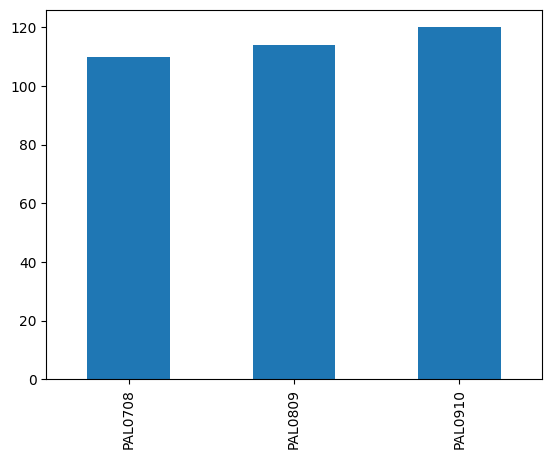

In [277]:
df['studyName'].value_counts(sort=False).plot.bar()

The distribution of instances between the studies appears fairly similar. All of between 100-120 data points. 

### Sample Number
An integer denoting the continuous numbering sequence for each sample

In [278]:
df['Sample Number'].unique()


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152])

sampleNumber is not unique. 

### Species
A character string denoting the penguin species.

In [279]:
df['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

<AxesSubplot:>

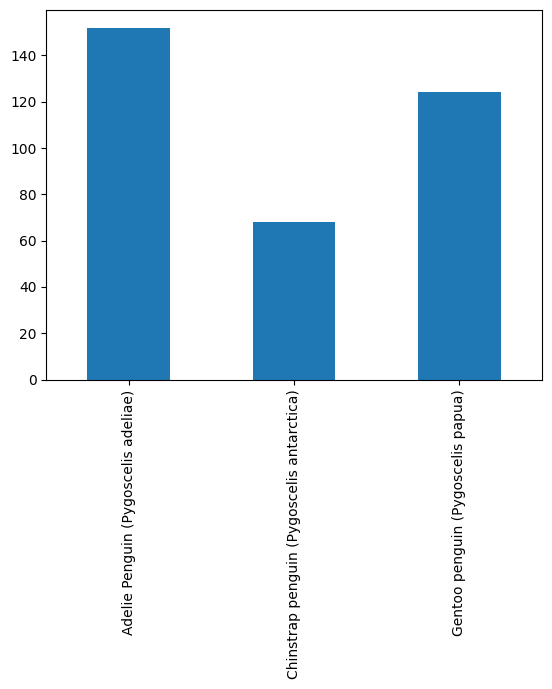

In [280]:
df['Species'].value_counts(sort=False).plot.bar()

### Region
A character string denoting the region of Palmer LTER sampling grid

In [281]:
df['Region'].unique()

array(['Anvers'], dtype=object)

Only one region. 

### Island
A character string denoting the island near Palmer Station where samples were collected.

In [282]:
df['Island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

<AxesSubplot:ylabel='# of Instances'>

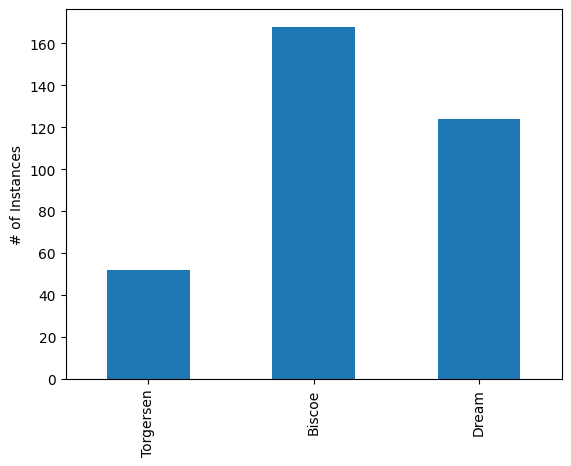

In [283]:
df['Island'].value_counts(sort=False).plot.bar(ylabel='# of Instances')

### Stage
 A character string denoting reproductive stage at sampling

In [284]:
df['Stage'].unique()

array(['Adult, 1 Egg Stage'], dtype=object)

<AxesSubplot:ylabel='# of Instances'>

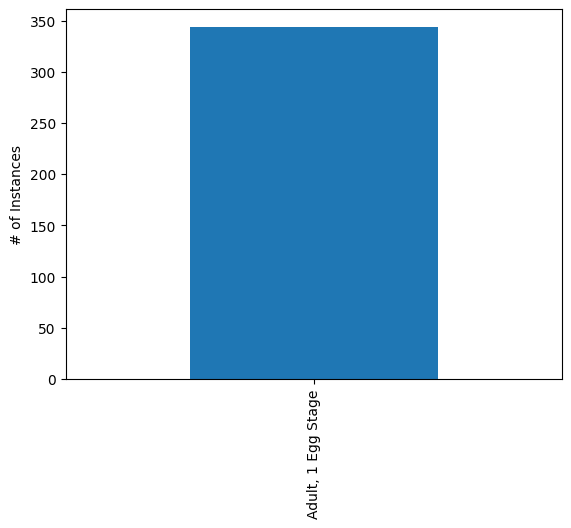

In [285]:
df['Stage'].value_counts(sort=False).plot.bar(ylabel='# of Instances')

### Individual ID
A character string denoting the unique ID for each individual in dataset

In [286]:
df['Individual ID'].unique()

array(['N1A1', 'N1A2', 'N2A1', 'N2A2', 'N3A1', 'N3A2', 'N4A1', 'N4A2',
       'N5A1', 'N5A2', 'N6A1', 'N6A2', 'N7A1', 'N7A2', 'N8A1', 'N8A2',
       'N9A1', 'N9A2', 'N10A1', 'N10A2', 'N11A1', 'N11A2', 'N12A1',
       'N12A2', 'N13A1', 'N13A2', 'N17A1', 'N17A2', 'N18A1', 'N18A2',
       'N21A1', 'N21A2', 'N22A1', 'N22A2', 'N23A1', 'N23A2', 'N24A1',
       'N24A2', 'N25A1', 'N25A2', 'N26A1', 'N26A2', 'N27A1', 'N27A2',
       'N28A1', 'N28A2', 'N29A1', 'N29A2', 'N30A1', 'N30A2', 'N32A1',
       'N32A2', 'N34A1', 'N34A2', 'N35A1', 'N35A2', 'N36A1', 'N36A2',
       'N37A1', 'N37A2', 'N38A1', 'N38A2', 'N39A1', 'N39A2', 'N40A1',
       'N40A2', 'N41A1', 'N41A2', 'N42A1', 'N42A2', 'N44A1', 'N44A2',
       'N45A1', 'N45A2', 'N46A1', 'N46A2', 'N48A1', 'N48A2', 'N49A1',
       'N49A2', 'N50A1', 'N50A2', 'N47A1', 'N47A2', 'N51A1', 'N51A2',
       'N53A1', 'N53A2', 'N55A1', 'N55A2', 'N58A1', 'N58A2', 'N60A1',
       'N60A2', 'N61A1', 'N61A2', 'N63A1', 'N63A2', 'N64A1', 'N64A2',
       'N66A1', 'N66

### Clutch Completion
A character string denoting if the study nest observed with a full clutch, i.e., 2 eggs

In [287]:
df['Clutch Completion'].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:>

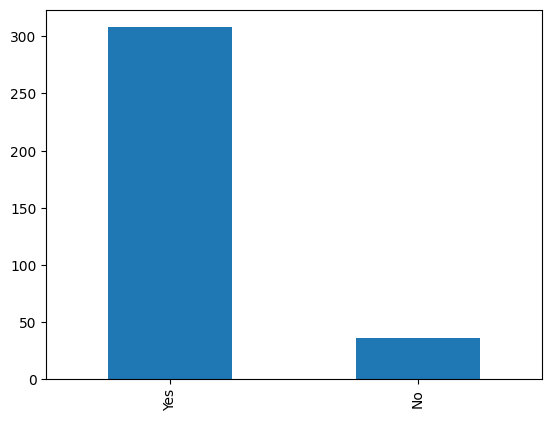

In [288]:
df['Clutch Completion'].value_counts(sort=False).plot.bar()

### Date Egg 
A date denoting the date study nest observed with 1 egg (sampled)

In [289]:
df['Date Egg'].unique()

array(['11/11/07', '11/16/07', '11/15/07', '11/9/07', '11/12/07',
       '11/10/07', '11/13/07', '11/19/07', '11/6/08', '11/9/08',
       '11/15/08', '11/13/08', '11/11/08', '11/14/08', '11/8/08',
       '11/2/08', '11/7/08', '11/17/08', '11/5/08', '11/10/08', '11/9/09',
       '11/15/09', '11/20/09', '11/12/09', '11/17/09', '11/18/09',
       '11/22/09', '11/16/09', '11/21/09', '11/23/09', '11/10/09',
       '11/13/09', '11/14/09', '11/26/07', '11/21/07', '11/28/07',
       '11/22/07', '11/30/07', '12/3/07', '11/25/08', '11/24/08',
       '11/27/09', '11/19/09', '11/27/07', '11/18/07', '11/29/07',
       '11/4/08', '11/3/08', '11/25/09', '12/1/09'], dtype=object)

<AxesSubplot:>

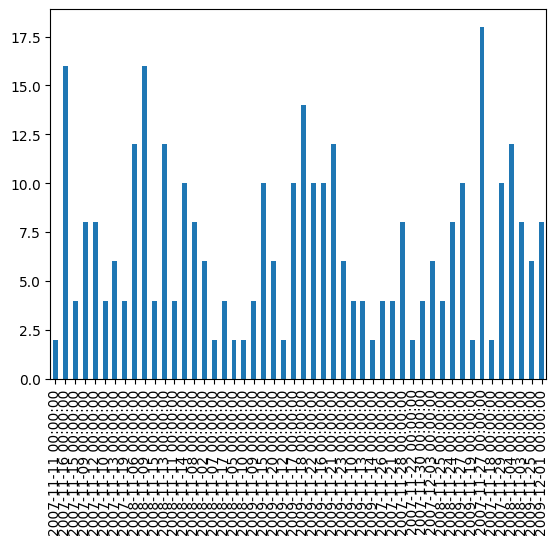

In [411]:
import datetime
df['Date Egg'] =  pd.to_datetime(df['Date Egg'], format='%Y/%d/%m')
df['Date Egg'].value_counts(sort=False).plot.bar()


### Culmen Length 
A number denoting the length of the dorsal ridge of a bird's bill (millimetres)

<AxesSubplot:>

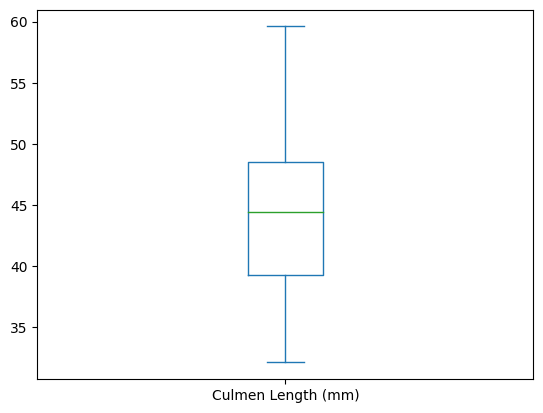

In [291]:
import scipy
df['Culmen Length (mm)'].plot(y='Culmen Length (mm)', kind = 'box')

<AxesSubplot:ylabel='Density'>

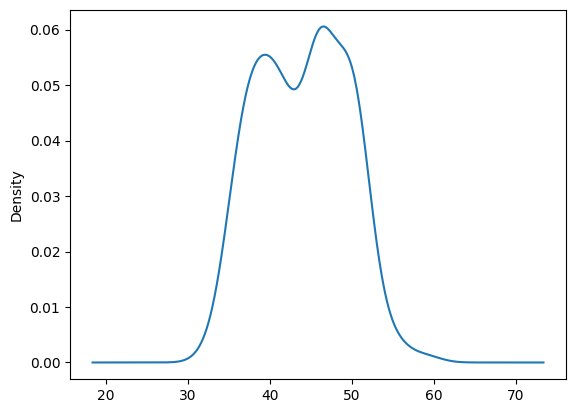

In [292]:
df['Culmen Length (mm)'].plot(y='Culmen Length (mm)', kind = 'kde')

### Culmen Depth 
A number denoting the depth of the dorsal ridge of a bird's bill (millimetres)

<AxesSubplot:>

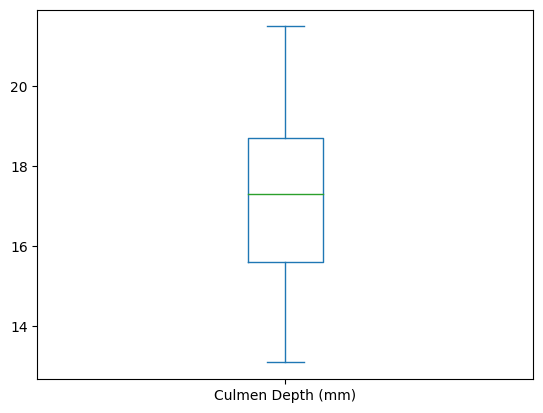

In [293]:
import scipy
df['Culmen Depth (mm)'].plot(y='Culmen Depth (mm)', kind = 'box')

<AxesSubplot:ylabel='Density'>

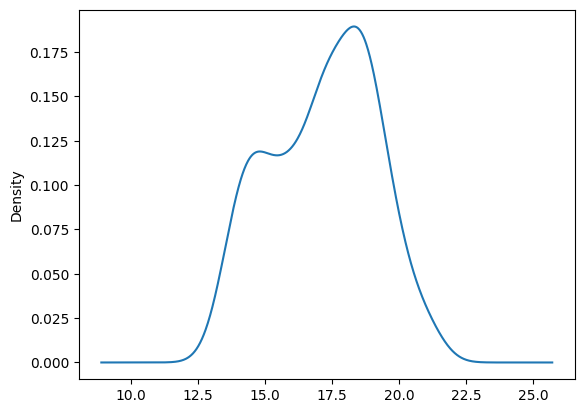

In [294]:
df['Culmen Depth (mm)'].plot(y='Culmen Depth (mm)', kind = 'kde')

### Flipper Length 
An integer denoting the length penguin flipper (millimetres)

<AxesSubplot:>

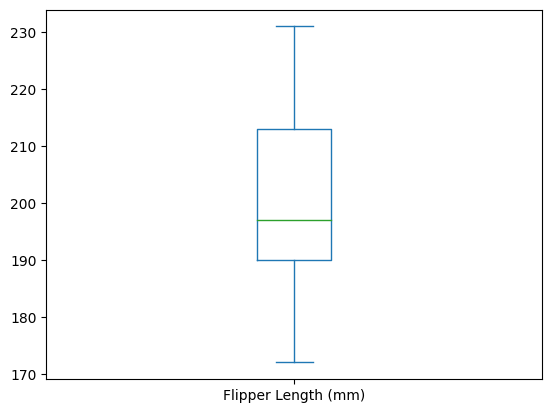

In [295]:
df['Flipper Length (mm)'].plot(kind = 'box')

<AxesSubplot:ylabel='Density'>

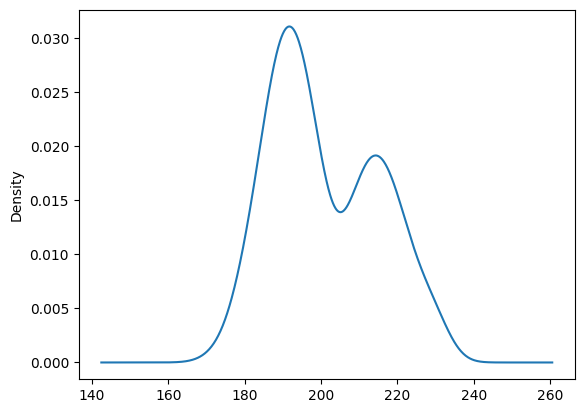

In [296]:
df['Flipper Length (mm)'].plot(kind = 'kde')

### Body Mass 
An integer denoting the penguin body mass (grams)

<AxesSubplot:>

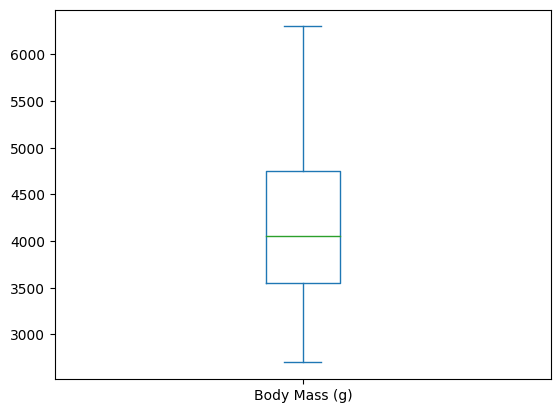

In [297]:
df['Body Mass (g)'].plot(kind = 'box')

<AxesSubplot:ylabel='Density'>

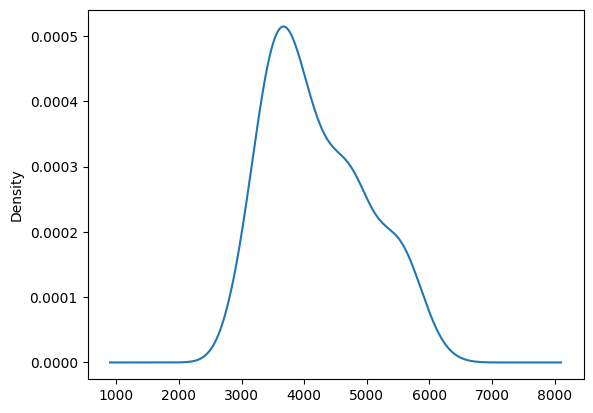

In [298]:
df['Body Mass (g)'].plot(kind = 'kde')

### Sex
A character string denoting the sex of an animal

In [299]:
df['Sex'].unique()

array(['MALE', 'FEMALE', 'Unknown', '.'], dtype=object)

Going to assume that '.' is a typo and I am going to replace it with unkown.

In [300]:
df=df.replace('.', 'Unknown')

<AxesSubplot:>

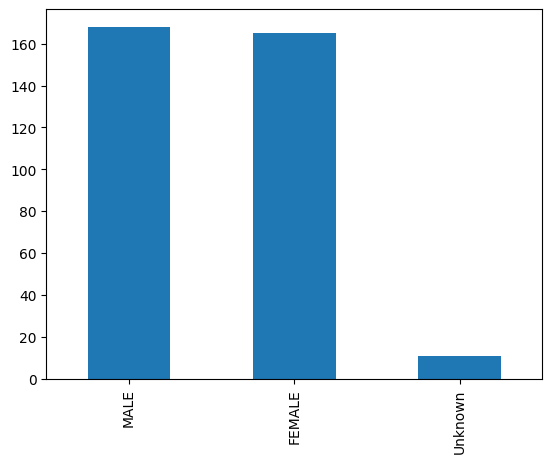

In [301]:
df['Sex'].value_counts(sort=False).plot.bar()

### Delta 15 N 
A number denoting the measure of the ratio of stable isotopes 15N:14N

<AxesSubplot:>

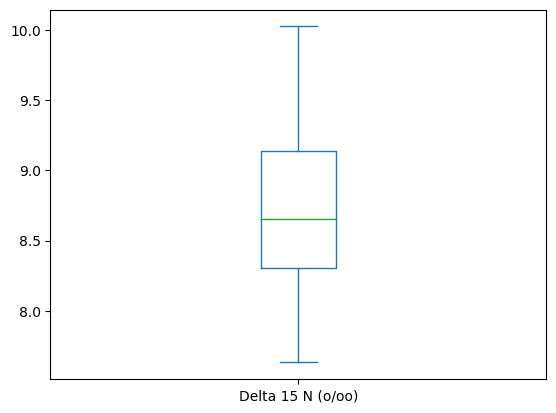

In [302]:
df['Delta 15 N (o/oo)'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

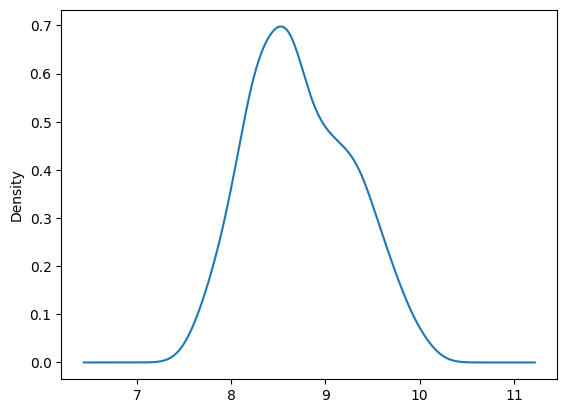

In [303]:
df['Delta 15 N (o/oo)'].plot(kind='kde')

### Delta 13 C
A number denoting the measure of the ratio of stable isotopes 13C:12C

<AxesSubplot:>

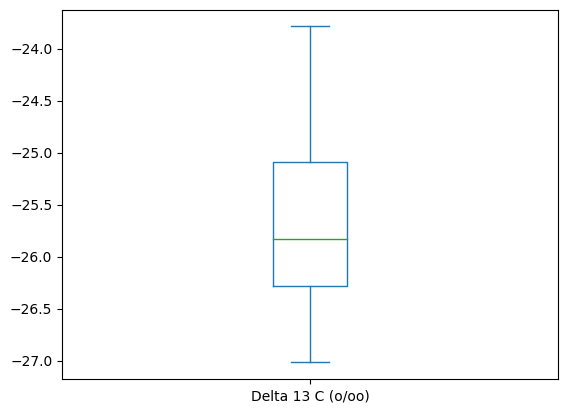

In [304]:
df['Delta 13 C (o/oo)'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

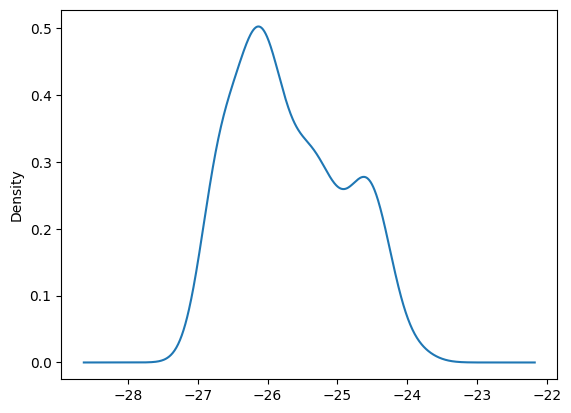

In [305]:
df['Delta 13 C (o/oo)'].plot(kind='kde')

In [306]:
fig, axes = plt.subplots(nrows=2, ncols=3) # create 2x2 array of subplots

df.boxplot(column='Culmen Length (mm)', ax=axes[0,0])
df.boxplot(column='Culmen Depth (mm)', ax=axes[0,1])
df.boxplot(column='Flipper Length (mm)', ax=axes[0,2])
df.boxplot(column='Body Mass (g)', ax=axes[1,0])
df.boxplot(column='Delta 15 N (o/oo)', ax=axes[1,1])
df.boxplot(column='Delta 13 C (o/oo)', ax=axes[1,2])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplots'

### Comments 
A character string with text providing additional relevant information for data

<AxesSubplot:>

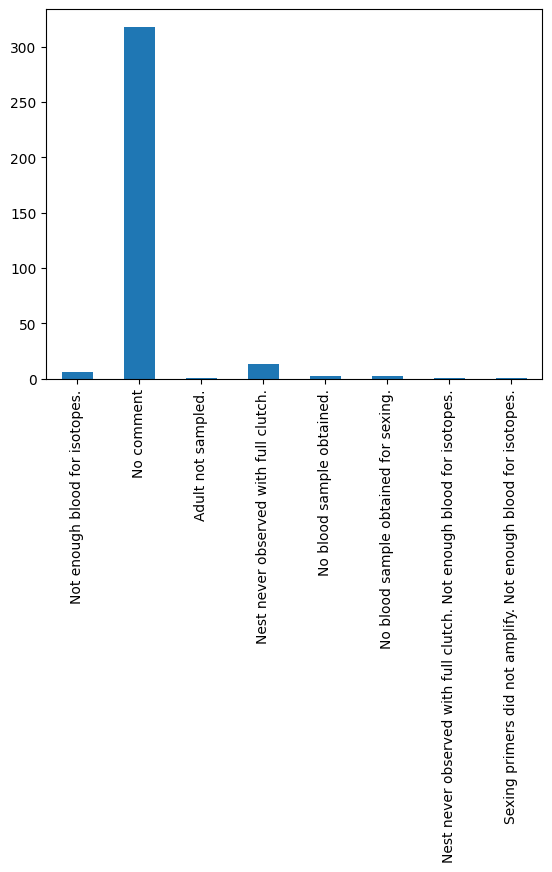

In [ ]:
df['Comments'].value_counts(sort=False).plot.bar()

## 3.2 Bivariate 

### Species vs Island


In [ ]:
import plotly.express as px

px.bar( data_frame=df, y = 'Island', 
        facet_row='Species',facet_row_spacing=0.10, 
        pattern_shape='Species',
        color='Species', 
        color_discrete_map={'Adelie Penguin (Pygoscelis adeliae)':'rgb(251,117,4)', 'Chinstrap penguin (Pygoscelis antarctica)':'rgb(167,98,188)', 'Gentoo penguin (Pygoscelis papua)':'rgb(4,115,116)'},
        width=800,height=900 )

### Species vs Sex

In [ ]:
fig =px.bar( data_frame=df, y = 'Sex',
facet_row='Species',facet_row_spacing=0.10,
pattern_shape='Species',
color='Species',
color_discrete_map={'Adelie Penguin (Pygoscelis adeliae)':'rgb(251,117,4)', 'Chinstrap penguin (Pygoscelis antarctica)':'rgb(167,98,188)', 'Gentoo penguin (Pygoscelis papua)':'rgb(4,115,116)'},
width=800,height=900 )

fig.show()


### Body Mass vs Flipper Length

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

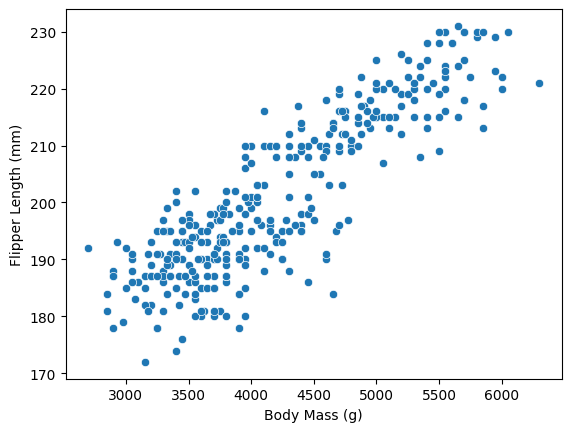

In [ ]:
sns.scatterplot(data=df, x='Body Mass (g)', y='Flipper Length (mm)')

### Culmen Length vs Culmen Depth

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

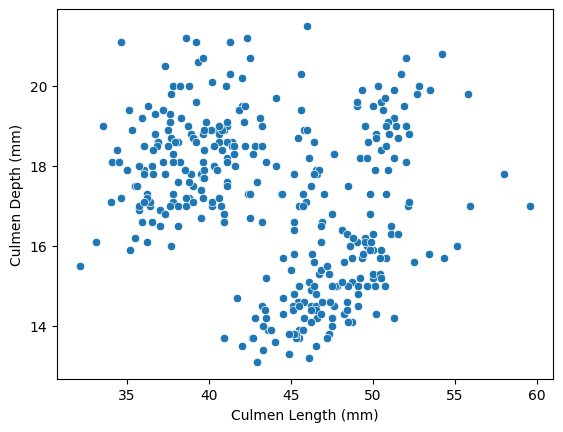

In [ ]:
sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)')

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

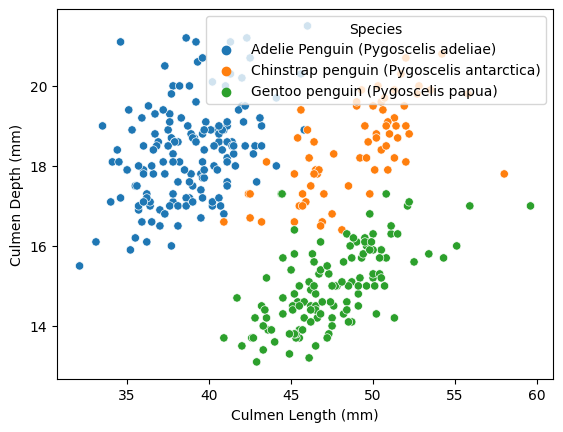

In [ ]:
sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species')

### Body Mass vs Species

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

trace_bm = []
color =['darkorange','mediumorchid','teal']
for var,col in zip(df.Species.unique(),color):
    trace = go.Violin(x = df['Species'][df['Species']==var], y =df['Body Mass (g)'][df['Species']==var],
                    box_visible=True,
                    meanline_visible=True,
                    points='all',
                    line_color=col,
                    name=var)
    trace_bm.append(trace)
trace_flipper = []
for var,col in zip(df.Species.unique(),color):
    trace2 = go.Violin(x = df['Species'][df['Species']==var], y =df['Flipper Length (mm)'][df['Species']==var],
             box_visible=True,
             meanline_visible=True,
             points='all',
             line_color=col,
        )
    trace_flipper.append(trace2)
fig = make_subplots(rows=2, cols=1, subplot_titles=("Body Mass (g)","Flipper Length (mm)")) 
for i in trace_bm:
    fig.add_trace(i,row=1,col=1)
for j in trace_flipper:    
    fig.add_trace(j,row=2,col=1)
fig.update_layout(showlegend = False, title = 'Violin Plots',height=800)
fig.show()

# 4. Correlations

Text(0.5, 1.0, 'Adelie Penguin Correlates')

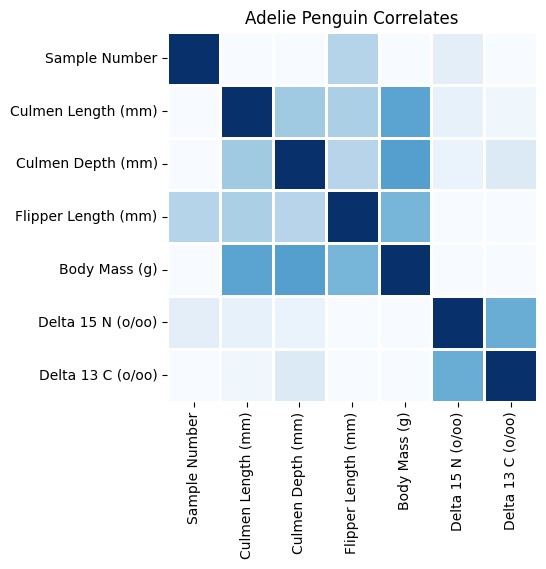

In [394]:
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

groups = df.groupby('Species')

adelie = df[df['Species'] == 'Adelie Penguin (Pygoscelis adeliae)'].select_dtypes([np.number])
chinstrap = df[df['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)'].select_dtypes([np.number])
gentoo = df[df['Species'] == 'Gentoo penguin (Pygoscelis papua)'].select_dtypes([np.number])

corr = adelie.corr()

fig, axes = plt.subplots(1,1)
ax = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')

ax.set_title("Adelie Penguin Correlates")

Text(0.5, 1.0, 'Chinstrap Penguin Correlates')

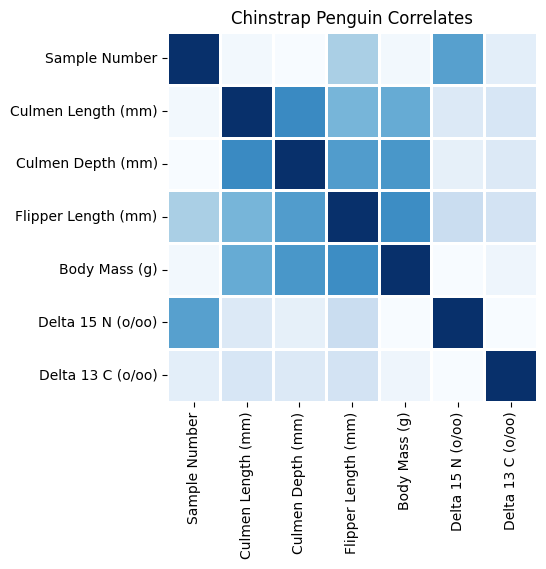

In [395]:
corr = chinstrap.corr()
ax = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
ax.set_title("Chinstrap Penguin Correlates")

Text(0.5, 1.0, 'Chinstrap Penguin Correlates')

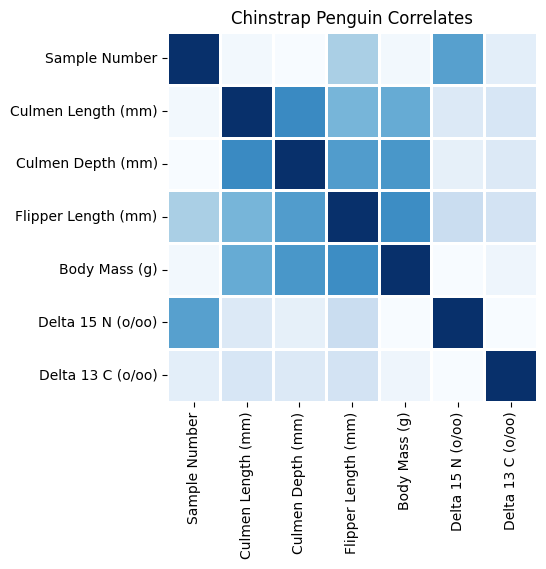

In [396]:
corr = chinstrap.corr()
ax = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
ax.set_title("Chinstrap Penguin Correlates")

# K-means Clustering

### What is Kmeans Clustering?

### K-means Analysis

In [ ]:
y = df['Species']
x=df.loc[:, df.columns != 'Species']
x = pd.get_dummies(x)
x.head()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),studyName_PAL0708,studyName_PAL0809,studyName_PAL0910,...,Comments_Nest never observed with full clutch.,Comments_Nest never observed with full clutch. Not enough blood for isotopes.,Comments_No blood sample obtained for sexing.,Comments_No blood sample obtained.,Comments_No comment,Comments_Not enough blood for isotopes.,Comments_Sexing primers did not amplify. Not enough blood for isotopes.,Sex_FEMALE,Sex_MALE,Sex_Unknown
0,1,39.10,18.7,181.0,3750.0,8.652405,-25.83352,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2,39.50,17.4,186.0,3800.0,8.949560,-24.69454,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3,40.30,18.0,195.0,3250.0,8.368210,-25.33302,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,4,44.45,17.3,197.0,4050.0,8.652405,-25.83352,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,36.70,19.3,193.0,3450.0,8.766510,-25.32426,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(x)

KMeans(n_clusters=3)

In [ ]:
labels=model.predict(x)

In [ ]:
matrix = pd.DataFrame({'labels': labels, 'Species': y})
ct = pd.crosstab(matrix['labels'], matrix['Species'])
ct


Species,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua)
labels,,,
0,41,16,51
1,111,52,1
2,0,0,72


In [ ]:
model.cluster_centers_
culmen_length_centres = model.cluster_centers_[:,1]
culmen_depth_centres = model.cluster_centers_[:,2]


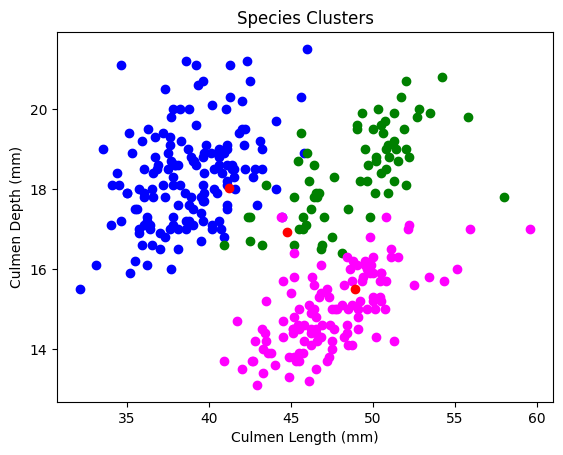

In [ ]:
import matplotlib.pyplot as plt


adelie = df[df['Species'] == 'Adelie Penguin (Pygoscelis adeliae)']
chinstrap = df[df['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)']
gentoo = df[df['Species'] == 'Gentoo penguin (Pygoscelis papua)']

plt.scatter(adelie['Culmen Length (mm)'],adelie['Culmen Depth (mm)'],c='blue')
plt.scatter(chinstrap['Culmen Length (mm)'],chinstrap['Culmen Depth (mm)'],c='green')
plt.scatter(gentoo['Culmen Length (mm)'],gentoo['Culmen Depth (mm)'],c='magenta')
plt.scatter(culmen_length_centres,culmen_depth_centres,c='red')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Species Clusters')
plt.show()

### Optimality of 3 Clusters

In [ ]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
  
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / x.shape[0]
    mapping2[k] = kmeanModel.inertia_

for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 676.1081986625233
2 : 351.44781078110043
3 : 252.5445379211709
4 : 188.13845975642977
5 : 157.26284748032865
6 : 139.26125390090172
7 : 122.91340048099956
8 : 110.003590292872
9 : 97.16389091352042


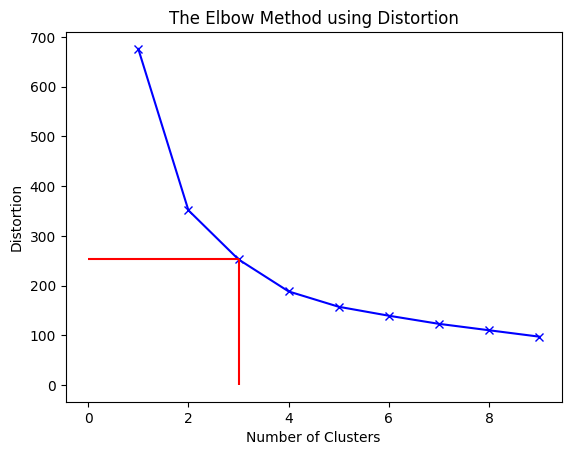

In [ ]:
fig, ax = plt.subplots()
ax.plot(K, distortions, 'bx-')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Distortion')
ax.set_title('The Elbow Method using Distortion')

ax.hlines(y=252.76800159818768, xmin=0, xmax=3, color='r')
ax.vlines(x=3, ymin=0, ymax=252.76800159818768, color='r')
plt.show()

# PCA

In [359]:
#Drop columns that are non unique or artifacts of previous analysis
y=df['Species']
dumb_data=df.drop(['Sample Number', 'Species', 'Individual ID','Region','Date Egg','Stage'], axis=1)

dumb_data = pd.get_dummies(dumb_data)
normalized_bumb_df=(dumb_data-dumb_data.mean())/dumb_data.std()
normalized_bumb_df.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),studyName_PAL0708,studyName_PAL0809,studyName_PAL0910,Island_Biscoe,...,Comments_Nest never observed with full clutch.,Comments_Nest never observed with full clutch. Not enough blood for isotopes.,Comments_No blood sample obtained for sexing.,Comments_No blood sample obtained.,Comments_No comment,Comments_Not enough blood for isotopes.,Comments_Sexing primers did not amplify. Not enough blood for isotopes.,Sex_FEMALE,Sex_MALE,Sex_Unknown
0,-0.886331,0.786144,-1.418475,-0.563804,-0.143686,-0.181790,1.456396,-0.703002,-0.73086,-0.975587,...,-0.197891,-0.053916,-0.076361,-0.076361,-3.492165,7.494636,-0.053916,-0.958701,1.022044,-0.181486
1,-0.812853,0.125931,-1.061939,-0.501280,0.405960,1.279795,1.456396,-0.703002,-0.73086,-0.975587,...,-0.197891,-0.053916,-0.076361,-0.076361,0.285523,-0.133041,-0.053916,1.040046,-0.975587,-0.181486
2,-0.665896,0.430645,-0.420174,-1.189041,-0.669360,0.460472,1.456396,-0.703002,-0.73086,-0.975587,...,-0.197891,-0.053916,-0.076361,-0.076361,0.285523,-0.133041,-0.053916,1.040046,-0.975587,-0.181486
3,0.096440,0.075145,-0.277559,-0.188662,-0.143686,-0.181790,1.456396,-0.703002,-0.73086,-0.975587,...,-0.197891,-0.053916,-0.076361,-0.076361,-3.492165,-0.133041,-0.053916,-0.958701,-0.975587,5.494063
4,-1.327200,1.090858,-0.562788,-0.938946,0.067373,0.471713,1.456396,-0.703002,-0.73086,-0.975587,...,-0.197891,-0.053916,-0.076361,-0.076361,0.285523,-0.133041,-0.053916,1.040046,-0.975587,-0.181486


In [360]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(normalized_bumb_df)

fig = px.scatter(components, x=0, y=1, color=df['Species'])
fig.show()

In [361]:
pca = PCA(n_components=3)
components = pca.fit_transform(normalized_bumb_df)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [362]:
pca = PCA()
pca.fit(normalized_bumb_df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)